# 正在测试第一类 NEO 的ROC

In [2]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from pspnet import Pspnet
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
pspnet = Pspnet()

class_num = 1

dir_origin_path = "ROCtest/demo2/"  

img_name = '1.jpg'    # 要评估的jpg和png名称
mask_name = '1.png'

image_path = os.path.join(dir_origin_path, img_name)
image = Image.open(image_path)
png_path = os.path.join(dir_origin_path, mask_name)
png = Image.open(png_path)

# pr 像素级别的预测概率，是一个三维tensor

pr = pspnet.show_prob(image)
pr = np.array(pr)
pr

logs/ep100-loss0.304-val_loss0.369.h5 model loaded.


array([[[1.00000000e+00, 1.76613984e-11, 1.70070340e-08],
        [1.00000000e+00, 1.42163720e-11, 1.42480223e-08],
        [1.00000000e+00, 9.81315029e-12, 1.06747811e-08],
        ...,
        [1.00000000e+00, 3.10232634e-13, 1.37469855e-10],
        [1.00000000e+00, 9.72964981e-13, 4.17192059e-10],
        [1.00000000e+00, 1.52948661e-12, 6.51673271e-10]],

       [[1.00000000e+00, 1.34200463e-11, 1.24731381e-08],
        [1.00000000e+00, 1.07740830e-11, 1.04232658e-08],
        [1.00000000e+00, 7.39512878e-12, 7.77076004e-09],
        ...,
        [1.00000000e+00, 2.05697831e-13, 8.93790944e-11],
        [1.00000000e+00, 6.43226737e-13, 2.70679035e-10],
        [1.00000000e+00, 1.01058007e-12, 4.22639007e-10]],

       [[1.00000000e+00, 8.07195370e-12, 6.81674939e-09],
        [1.00000000e+00, 6.43707440e-12, 5.65520386e-09],
        [1.00000000e+00, 4.35380421e-12, 4.15578194e-09],
        ...,
        [1.00000000e+00, 7.89998289e-14, 3.14050834e-11],
        [1.00000000e+00, 2.43

In [4]:
# 制作预测为该类型概率的一维数组
y_pred_num = []
sum = 0
for i in range(0,pr.shape[0]):
    for j in range(0,pr.shape[1]):
        y_pred_num.append(pr[i,j,class_num])
        sum+=1

y_pred_num

[1.7661398e-11,
 1.4216372e-11,
 9.81315e-12,
 7.0427566e-12,
 4.9950478e-12,
 3.430741e-12,
 2.4886217e-12,
 1.753241e-12,
 1.2038421e-12,
 8.781327e-13,
 6.14784e-13,
 4.2795216e-13,
 3.0945044e-13,
 2.013396e-13,
 9.495444e-14,
 4.6340126e-14,
 1.9329995e-14,
 9.62578e-15,
 4.518258e-15,
 1.8511852e-15,
 9.659942e-16,
 4.3870843e-16,
 1.7688446e-16,
 9.61391e-17,
 4.24411e-17,
 1.8054363e-17,
 2.6891134e-17,
 4.2847794e-17,
 6.633802e-17,
 1.1078087e-16,
 1.7419206e-16,
 2.751903e-16,
 4.555024e-16,
 7.058043e-16,
 1.140055e-15,
 1.8689994e-15,
 2.849141e-15,
 4.71624e-15,
 5.730811e-15,
 5.997729e-15,
 6.284068e-15,
 6.579938e-15,
 6.8878293e-15,
 7.215843e-15,
 7.55468e-15,
 7.909814e-15,
 8.2855806e-15,
 8.6736445e-15,
 9.083315e-15,
 9.513756e-15,
 1.0927053e-14,
 1.8560376e-14,
 3.15382e-14,
 4.9017844e-14,
 8.58145e-14,
 1.4400308e-13,
 2.247927e-13,
 3.960458e-13,
 6.5547307e-13,
 1.0449219e-12,
 1.8241864e-12,
 2.973181e-12,
 4.8505228e-12,
 5.128098e-12,
 4.8418903e-12,
 4.

In [5]:

# 制作真实标签的一维数组
y_true = np.array(png)
sum_true = 0
y_true_num = []
for i in range(0,y_true.shape[0]):
    for j in range(0,y_true.shape[1]):
        y_true_num.append(y_true[i,j,class_num])
        sum_true +=1

y_true_num

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [6]:


# 将真实标签转换为布尔型 Ture or False
y_true_num = np.array(y_true_num, dtype=bool)


In [7]:

# dataframe格式列出
# 像素值 | 对应类型的概率值
# y_pred_num = np.concatenate(y_pred_num, axis=0)
# y_true_num = np.concatenate(y_true_num, axis=0)

# 绘制ROC曲线
fpr, tpr, thresholds = metrics.roc_curve(y_true_num, y_pred_num)


In [8]:
auc = metrics.auc(fpr, tpr)
auc

0.9385489048287752

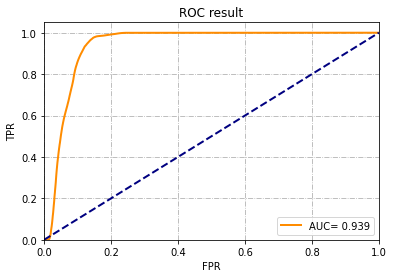

area under roc is:  0.9385489048287752


In [10]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='AUC= %0.3f' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(linestyle='-.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-curve')
plt.legend(loc="lower right")
plt.savefig("roc-%s.png" %str(class_num))
plt.show()